<a href="https://colab.research.google.com/github/pathilink/criteo_case/blob/main/notebook/criteo_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#FE5B00>Criteo</font> <font color=#13008E>Analytics Case</font>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format) # scientific notation

## Data

In [3]:
df = pd.read_excel('/content/drive/MyDrive/test/criteo/criteo_analytics_case_study_2025.xlsx')
df.sample(5)

,Year,Month,Country,Advertiser_ID,Industry,Clicks,Displays,Client_Sales,Client_Revenue
11404,2024,5,FR,A738,SPORTING GOODS,642,101069,4,"1,008.58"
29959,2024,12,US,A1950,HOME IMPROVEMENT / GARDENING / INTERIOR DESIGN,8225,1710819,226,"41,192.36"
28292,2024,11,US,A1828,FASHION / LUXURY,1259,273046,60,"9,568.99"
19642,2023,6,GB,A1216,GAMING / GAMBLING,10,8,0,0.00
22022,2024,2,GB,A1356,OTHER,1266,419401,13,"1,170.46"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32961 entries, 0 to 32960
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            32961 non-null  int64  
 1   Month           32961 non-null  int64  
 2   Country         32961 non-null  object 
 3   Advertiser_ID   32961 non-null  object 
 4   Industry        32961 non-null  object 
 5   Clicks          32961 non-null  object 
 6   Displays        32961 non-null  object 
 7   Client_Sales    32961 non-null  int64  
 8   Client_Revenue  32961 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.3+ MB


In [5]:
df.groupby('Country')['Country'].count().rename('Total')

,Total
Country,
BR,2859
DE,5555
FR,8546
GB,5515
JP,929
US,9557


In [6]:
df.groupby('Year')['Year'].count().rename('Total')

,Total
Year,
2023,14335
2024,18626


In [7]:
df['Advertiser_ID'].nunique()

2156

In [8]:
df['Industry'].unique()

array(['AUCTIONS', 'AUTOMOBILE / MOTO / BOATING', 'B2B / OFFICE',
       'BANKING / FINANCE / INSURANCE', 'CLASSIFIED ADS',
       'COMPUTING / HIGH TECH RETAILERS',
       'CULTURE / MEDIA / TICKETS / LEISURE',
       'EDUCATION, FAMILY AND YOUTH', 'FASHION / LUXURY',
       'FLOWERS & GIFTS', 'FOOD & BEVERAGES', 'GAMING / GAMBLING',
       'HEALTH / BEAUTY',
       'HOME IMPROVEMENT / GARDENING / INTERIOR DESIGN', 'MASS MERCHANT',
       'OTHER', 'REAL ESTATE', 'SPORTING GOODS',
       'TELECOMMUNICATION / INTERNET', 'TOYS & GADGETS', 'TRAVEL',
       'COMPUTING / HIGH TECH OEM', 'DATING', 'EMPLOYMENT',
       'PRICE COMPARATORS', 'FILLER / TEST'], dtype=object)

In [9]:
df_ = df.copy()

In [10]:
# treat nulls

# '[NULL]' -> NaN
df_['Clicks'] = pd.to_numeric(df_['Clicks'], errors='coerce')
df_['Displays'] = pd.to_numeric(df_['Displays'], errors='coerce')

df_[['Clicks', 'Displays']] = df_[['Clicks', 'Displays']].fillna(0).astype(int)
df_[['Clicks', 'Displays']].sample(3)

,Clicks,Displays
29028,1713,442398
2798,23479,6083505
29620,38,2670


## Question 1
We are trying to assess how much the Brazil (BR) market is exposed to its top clients. How many clients are needed to make up 40% of Brazil’s clicks in 2024?

In [11]:
df_br = df_.query('Country == "BR" & Year == 2024')
df_br.head()

,Year,Month,Country,Advertiser_ID,Industry,Clicks,Displays,Client_Sales,Client_Revenue
1,2024,5,BR,A2,AUTOMOBILE / MOTO / BOATING,57114,4709714,722,"5,746,100.93"
2,2024,6,BR,A2,AUTOMOBILE / MOTO / BOATING,22903,1479509,579,"4,847,614.12"
3,2024,7,BR,A2,AUTOMOBILE / MOTO / BOATING,50219,3394187,742,"6,634,991.64"
4,2024,8,BR,A2,AUTOMOBILE / MOTO / BOATING,50586,3621244,477,"4,041,559.78"
5,2024,9,BR,A2,AUTOMOBILE / MOTO / BOATING,50009,3600405,433,"3,296,489.65"


In [12]:
clicks_by_advertiser = df_br.groupby('Advertiser_ID')['Clicks'].sum().sort_values(ascending=False)#.reset_index()
clicks_by_advertiser.head(10)

,Clicks
Advertiser_ID,
A9,7720264
A24,5198795
A13,4227974
A33,2800175
A5,2168307
A22,2101798
A99,993325
A75,939631
A139,875097


In [13]:
total_clicks = clicks_by_advertiser.sum()
print(f'Total clicks: {total_clicks}')

# cumulative sum
clicks_cumsum = clicks_by_advertiser.cumsum()
clicks_cumsum.head(10)

Total clicks: 55851836


,Clicks
Advertiser_ID,
A9,7720264
A24,12919059
A13,17147033
A33,19947208
A5,22115515
A22,24217313
A99,25210638
A75,26150269
A139,27025366


In [14]:
# 40% clicks > 22115515
total_clicks * 0.4

np.float64(22340734.400000002)

In [15]:
(clicks_cumsum < total_clicks * 0.4).head(10)

,Clicks
Advertiser_ID,
A9,True
A24,True
A13,True
A33,True
A5,True
A22,False
A99,False
A75,False
A139,False


In [16]:
num_clients = (clicks_cumsum < total_clicks * 0.4).sum() + 1
print(f'Number of clients needed: {num_clients}')

Number of clients needed: 6


**clicks_cumsum**: This is a series with the cumulative sum of clicks per customer, ordered from the highest to the lowest number of clicks.

__total_clicks * 0.4__: This represents 40% of the total number of clicks.

__clicks_cumsum < total_clicks * 0.4__: This comparison returns a Boolean series (True or False) indicating whether the cumulative sum up to that point is still below 40% of the clicks.

__.sum()__ on a Boolean series: Sums True values as 1 and False values as 0. So, this gives you how many customers have contributed until you get close, but still below 40%.

__+ 1__: Adds one more customer, which is the one needed to finally exceed or reach 40%. After all, sum() stopped at the last one that was still below.

In [17]:
clicks_pct = (clicks_cumsum / clicks_by_advertiser.sum() * 100).rename('Cumulative clicks %')#.reset_index()
clicks_pct.head(10)

,Cumulative clicks %
Advertiser_ID,
A9,13.82
A24,23.13
A13,30.70
A33,35.71
A5,39.60
A22,43.36
A99,45.14
A75,46.82
A139,48.39


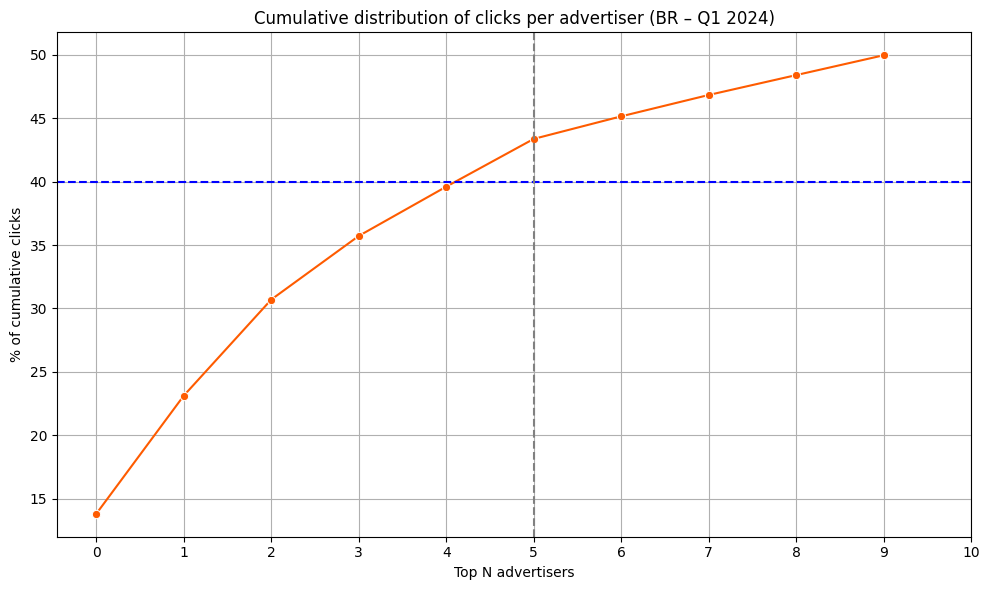

In [18]:
# Plot
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(10), y=clicks_pct.head(10).values, marker="o", color="#FE5B00")
# Destaque o ponto dos 40%
plt.axhline(y=40, color='blue', linestyle='--')
plt.axvline(x=5, color='gray', linestyle='--')  # índice 5 = 6º cliente (zero-based)

plt.title("Cumulative distribution of clicks per advertiser (BR – Q1 2024)")
plt.xlabel("Top N advertisers")
plt.ylabel("% of cumulative clicks")
plt.xticks(range(0, 11))  # up to 10
plt.grid(True)
plt.tight_layout()
plt.show()


## Question 2
What is the impact of the holiday sales period on the fashion industry? How does user behavior change during this time? (Pick a country of your choice)

In [19]:
df_fr_fashion = df_.query('Industry.str.startswith("FASHION") & Country == "FR"', engine='python')
df_fr_fashion.head()

,Year,Month,Country,Advertiser_ID,Industry,Clicks,Displays,Client_Sales,Client_Revenue
8599,2023,1,FR,A567,FASHION / LUXURY,333655,121967462,6431,"516,107.81"
8600,2023,2,FR,A567,FASHION / LUXURY,227825,85133506,4459,"352,355.80"
8601,2023,3,FR,A567,FASHION / LUXURY,164093,67557399,2912,"243,903.06"
8602,2023,4,FR,A567,FASHION / LUXURY,191699,67134949,3993,"286,151.87"
8603,2023,5,FR,A567,FASHION / LUXURY,193435,63078482,4145,"311,872.44"


<font color=#13008E>The end-of-year sales period is November and December (months 11 and 12).
<br>
I should compare this period with the rest of the year (months 1 to 10) - focus on clicks, displays, sales or revenue.
</font>

In [20]:
df_fr_fashion.groupby('Month')['Month'].count().rename('Total')

,Total
Month,
1,169
2,171
3,166
4,167
5,166
6,174
7,175
8,178
9,166


In [21]:
# separating periods
before_holidays = df_fr_fashion[df_fr_fashion['Month'] <= 10]
holiday_season = df_fr_fashion[df_fr_fashion['Month'] >= 11]

# comparing averages by month
before_avg = before_holidays[['Clicks', 'Displays', 'Client_Sales', 'Client_Revenue']].mean()
holiday_avg = holiday_season[['Clicks', 'Displays', 'Client_Sales', 'Client_Revenue']].mean()

In [22]:
before_avg

,0
Clicks,"15,465.19"
Displays,"3,787,375.21"
Client_Sales,320.72
Client_Revenue,"25,476.96"


In [23]:
holiday_avg

,0
Clicks,"17,355.28"
Displays,"3,552,459.70"
Client_Sales,366.55
Client_Revenue,"46,567.11"


In [24]:
# percentage difference
impact = ((holiday_avg - before_avg) / before_avg) * 100

print("Percentage change over the year-end period (Nov-Dec):")
df_impact = impact.round(2).rename('Percentage').to_frame().reset_index()
df_impact

Percentage change over the year-end period (Nov-Dec):


,index,Percentage
0,Clicks,12.22
1,Displays,-6.20
2,Client_Sales,14.29
3,Client_Revenue,82.78


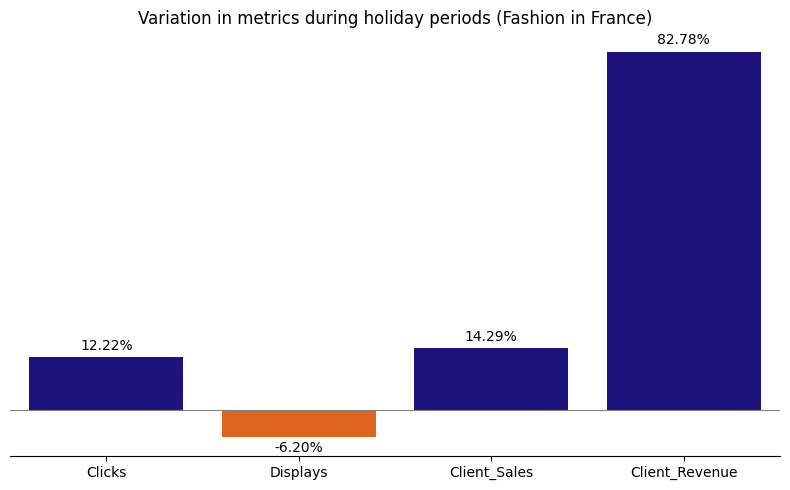

In [25]:
# Nov–Dec vs avg year

colors = ['#13008E' if x >= 0 else '#FE5B00' for x in df_impact['Percentage']]

plt.figure(figsize=(8, 5))
ax=sns.barplot(data=df_impact, x='index', y='Percentage', hue='index', legend=False, palette=colors)

# labels
for i, v in enumerate(df_impact['Percentage']):
    plt.text(i, v + (1 if v > 0 else -1), f'{v:.2f}%', ha='center', va='bottom' if v > 0 else 'top')

# remove subtitles and Y-axis
ax.set_ylabel("")
ax.set_xlabel("")
ax.tick_params(axis='y', left=False, labelleft=False)  # removes ticks and labels from the Y axis
sns.despine(left=True)  # remove the left edge

plt.axhline(0, color='gray', linewidth=0.8)
plt.title('Variation in metrics during holiday periods (Fashion in France)')
plt.tight_layout()
plt.show()

## Question 3
How much client revenue will we generate for our US advertisers in Q1 2025? Present your methodology.

In [26]:
df_us_2023 = df_.query('Country == "US" & Year == 2023 & Month in [1, 2, 3]')
revenue_q1_2023 = df_us_2023['Client_Revenue'].sum()
print(f'Revenue Q1 2023 (US): ${revenue_q1_2023:,.2f}')

df_us_2024 = df_.query('Country == "US" & Year == 2024 & Month in [1, 2, 3]')
revenue_q1_2024 = df_us_2024['Client_Revenue'].sum()
print(f'Revenue Q1 2024 (US): ${revenue_q1_2024:,.2f}')

Revenue Q1 2023 (US): $81,929,089.52
Revenue Q1 2024 (US): $298,461,921.57


In [27]:
growth_rate = (revenue_q1_2024 - revenue_q1_2023) / revenue_q1_2023
print(f'Growth rate: {growth_rate * 100:.2f}%')

estimated_revenue_q1_2025 = revenue_q1_2024 * (1 + growth_rate)
print(f"Estimated revenue Q1 2025 (US): ${estimated_revenue_q1_2025:,.2f}")

Growth rate: 264.29%
Estimated revenue Q1 2025 (US): $1,087,275,827.81


<font color=#13008E>
<strong>Estimated US Advertiser Revenue in Q1 2025:</strong>
<br>
- I used historical data from the first quarters of 2023 and 2024 to project performance in 2025.
<br>
- The growth rate observed between 2023 and 2024 was 264%.
<br>
- Applying this rate to the 2024 figure, we estimate that customer revenue in the US in Q1 2025 will be approximately US$ 1,087,275,827.81.
<br>
- This approach assumes that the annual growth pattern will be maintained, given recent history.

</font>

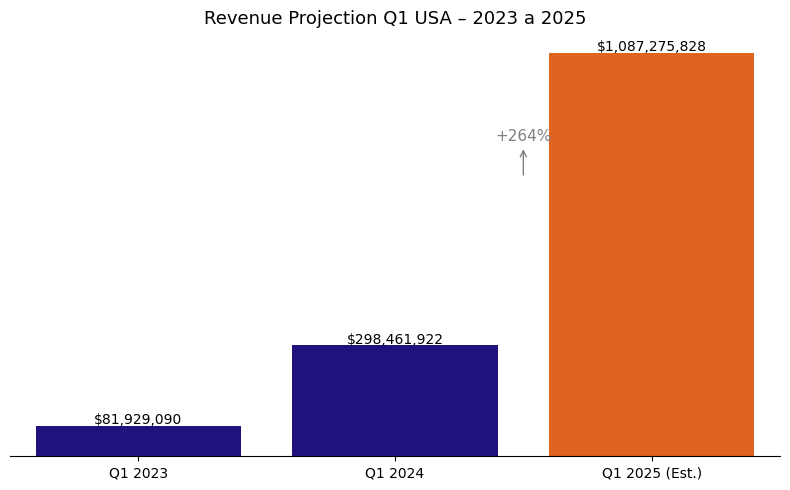

In [28]:
# data
quarters = ['Q1 2023', 'Q1 2024', 'Q1 2025 (Est.)']
revenues = [revenue_q1_2023, revenue_q1_2024, estimated_revenue_q1_2025]
colors_ = ["#13008E", "#13008E", "#FE5B00"]  # azul, azul, laranja

plt.figure(figsize=(8, 5))
bars = sns.barplot(x=quarters, y=revenues, hue=quarters, legend=False, palette=colors_)

# labels on the bars
for i, valor in enumerate(revenues):
    plt.text(i, valor + 5e6, f"${valor:,.0f}", ha='center', fontsize=10)

# annotation of growth
plt.annotate(
    "+264%",
    xy=(1.5, 750000000),
    xytext=(1.5, 850000000),
    arrowprops=dict(arrowstyle="<-", color='gray'),
    ha='center', fontsize=11, color='gray'
)

# style
plt.title("Revenue Projection Q1 USA – 2023 a 2025", fontsize=13)
plt.ylabel("")
plt.xlabel("")
bars.tick_params(axis='y', left=False, labelleft=False)  # removes ticks and labels from the Y axis
sns.despine(left=True)  # remove the left edge
plt.tight_layout()
plt.show()


## Question 4
What would your advice to the Criteo leadership be for 2025?

<font color=#13008E>
<strong>Based on the data analyzed, I recommend Criteo leadership to focus on:</strong>
<br>
- Client Concentration Management in Key Markets:
In Brazil, only 6 clients are responsible for 40% of clicks in 2024. This high concentration indicates potential risk and dependency. I advise diversifying the client base.
<br>
- Maximize Holiday Sales Impact for Fashion Clients:
During the Nov–Dec holiday season, user behavior shifts significantly, with a 12.22% increase in clicks and 82.78% growth in client revenue for the fashion sector. This highlights a major seasonal opportunity.
<br>
- Capitalize on US Market Momentum:
With an expected 264.29% growth in US client revenue for Q1 2025, the momentum is strong.
</font>

## Advanced Analysis

### Campaign efficiency (BR)

* CTR (Click-through rate): Clicks / Displays

* CPC (Cost per click): Client_Revenue / Clicks

* CPA (Cost per acquisition): Client_Revenue / Client_Sales

In [29]:
df_efficiency = df_br.groupby('Advertiser_ID')[['Clicks', 'Displays',	'Client_Sales', 'Client_Revenue']].sum() \
.reset_index() \
.sort_values(by='Clicks', ascending=False)

df_efficiency.head()

,Advertiser_ID,Clicks,Displays,Client_Sales,Client_Revenue
198,A9,7720264,1392250876,309903,"17,246,832.61"
129,A24,5198795,652614462,393661,"12,744,086.39"
31,A13,4227974,975029266,125080,"6,914,913.10"
139,A33,2800175,407697994,110680,"14,463,447.89"
156,A5,2168307,250716739,168229,"4,638,622.80"


In [30]:
df_efficiency['CTR'] = df_efficiency['Clicks'] / df_efficiency['Displays']
df_efficiency['CPC'] = df_efficiency['Client_Revenue'] / df_efficiency['Clicks']
df_efficiency['CPA'] = df_efficiency['Client_Revenue'] / df_efficiency['Client_Sales']
df_efficiency.head(10)

,Advertiser_ID,Clicks,Displays,Client_Sales,Client_Revenue,CTR,CPC,CPA
198,A9,7720264,1392250876,309903,"17,246,832.61",0.01,2.23,55.65
129,A24,5198795,652614462,393661,"12,744,086.39",0.01,2.45,32.37
31,A13,4227974,975029266,125080,"6,914,913.10",0.00,1.64,55.28
139,A33,2800175,407697994,110680,"14,463,447.89",0.01,5.17,130.68
156,A5,2168307,250716739,168229,"4,638,622.80",0.01,2.14,27.57
127,A22,2101798,408402680,49751,"3,451,414.38",0.01,1.64,69.37
208,A99,993325,122836378,11889,"2,552,285.60",0.01,2.57,214.68
183,A75,939631,176917053,6237,"1,666,896.87",0.01,1.77,267.26
41,A139,875097,123817233,4403,"1,491,770.65",0.01,1.70,338.81
54,A151,872824,139038811,13627,"555,114.52",0.01,0.64,40.74


* Efficient campaigns (⬇️ CPC and CPA)
* Very expensive campaigns (⬆️ CPC and CPA)

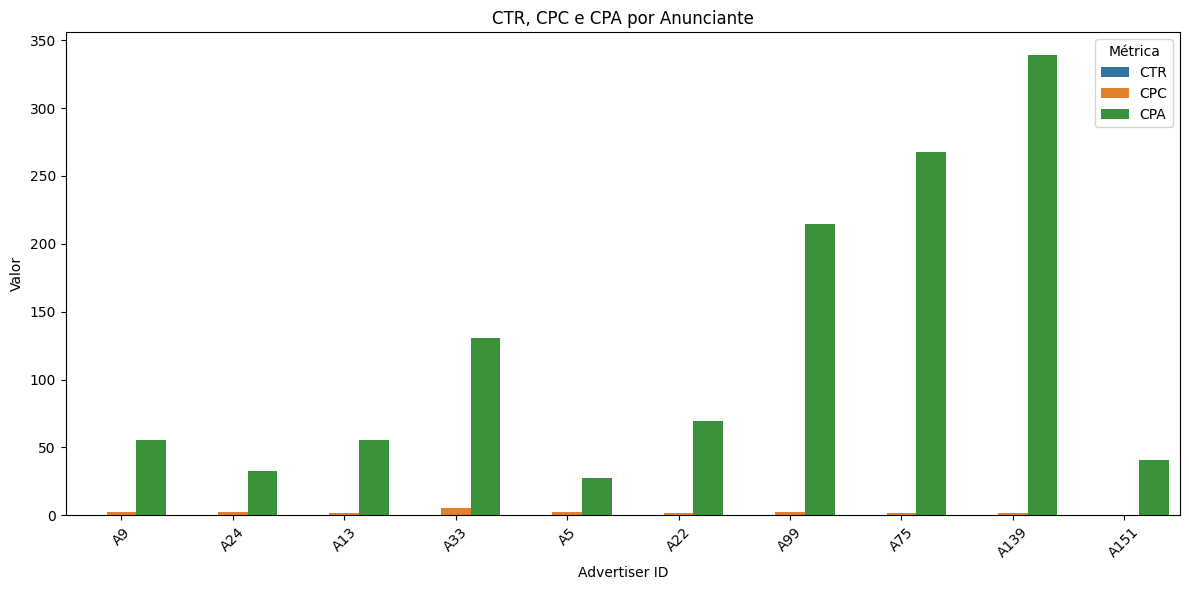

In [31]:
# Selecione apenas os 10 primeiros anunciantes (já filtrado)
df_plot = df_efficiency.head(10).copy()

# Transforma para formato "long" para facilitar o plot com seaborn ou matplotlib
df_melt = df_plot.melt(
    id_vars='Advertiser_ID',
    value_vars=['CTR', 'CPC', 'CPA'],
    var_name='Métrica',
    value_name='Valor'
)

# Plot com barras agrupadas
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='Advertiser_ID', y='Valor', hue='Métrica')
plt.title('CTR, CPC e CPA por Anunciante')
plt.ylabel('Valor')
plt.xlabel('Advertiser ID')
plt.legend(title='Métrica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


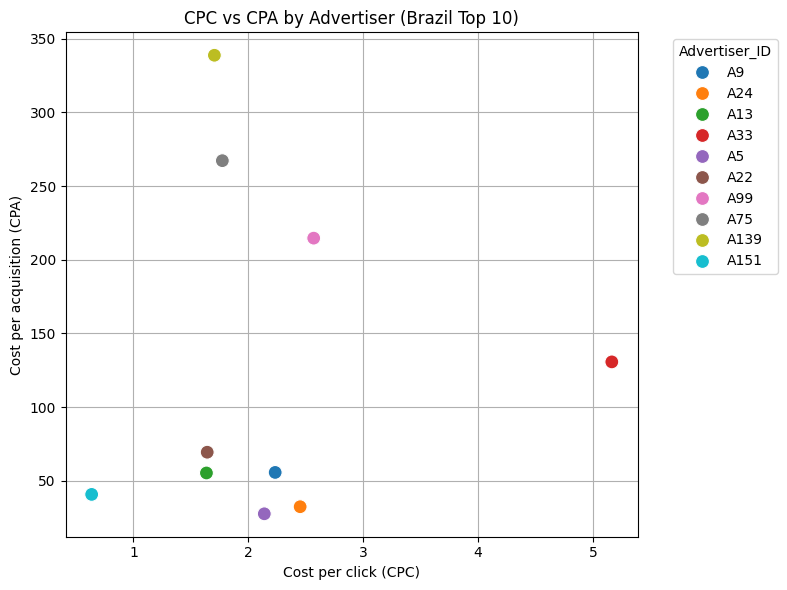

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_efficiency.head(10), x='CPC', y='CPA', hue='Advertiser_ID', palette='tab10', s=100)
plt.title('CPC vs CPA by Advertiser (Brazil Top 10)')
plt.xlabel('Cost per click (CPC)')
plt.ylabel('Cost per acquisition (CPA)')
plt.legend(title='Advertiser_ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


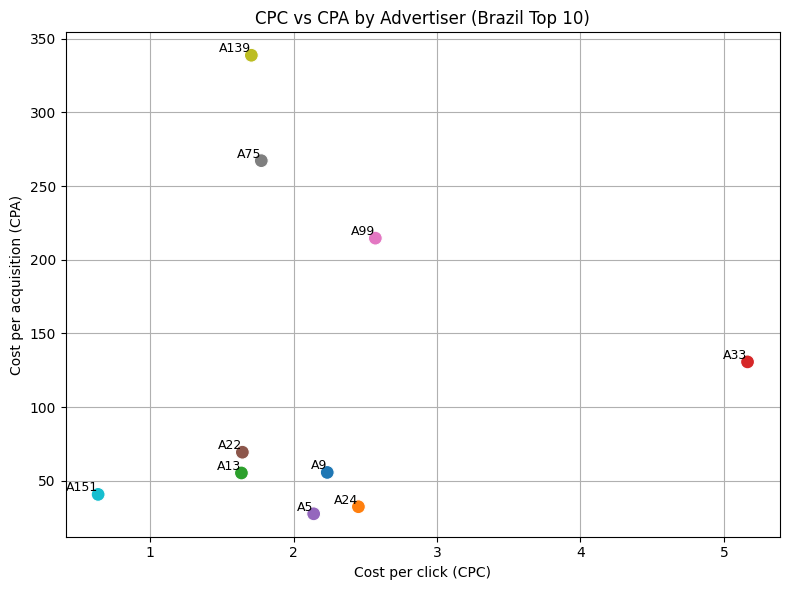

In [33]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_efficiency.head(10),
    x='CPC',
    y='CPA',
    hue='Advertiser_ID',
    palette='tab10',
    s=100,
    legend=False
)

# label
for i, row in df_efficiency.head(10).iterrows():
    plt.text(
        row['CPC'],
        row['CPA'],
        str(row['Advertiser_ID']),
        fontsize=9,
        ha='right',  # horizontal alignment
        va='bottom'  # vertical alignment
    )

plt.title('CPC vs CPA by Advertiser (Brazil Top 10)')
plt.xlabel('Cost per click (CPC)')
plt.ylabel('Cost per acquisition (CPA)')
plt.grid(True)
plt.tight_layout()
plt.show()


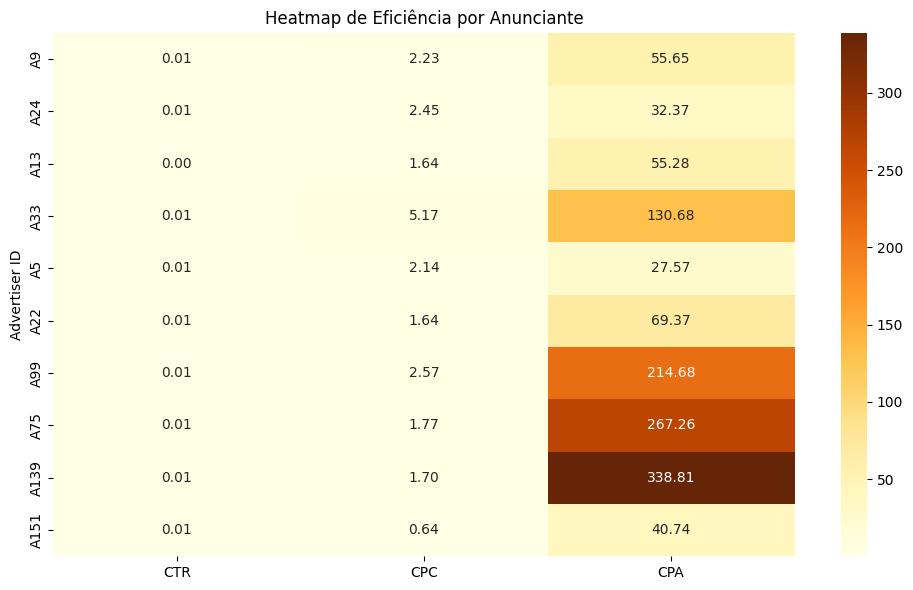

In [34]:
# Selecionar colunas relevantes e colocar o ID como índice
df_heat = df_plot.set_index('Advertiser_ID')[['CTR', 'CPC', 'CPA']]

plt.figure(figsize=(10, 6))
sns.heatmap(df_heat, annot=True, fmt=".2f", cmap="YlOrBr")
plt.title('Heatmap de Eficiência por Anunciante')
plt.ylabel('Advertiser ID')
plt.tight_layout()
plt.show()


### Revenue x Industry

In [35]:
pivot = df_.pivot_table(
    index='Country',
    columns='Industry',
    values='Client_Revenue',
    aggfunc='sum',
    fill_value=0
    )
pivot

Industry,AUCTIONS,AUTOMOBILE / MOTO / BOATING,B2B / OFFICE,BANKING / FINANCE / INSURANCE,CLASSIFIED ADS,COMPUTING / HIGH TECH OEM,COMPUTING / HIGH TECH RETAILERS,CULTURE / MEDIA / TICKETS / LEISURE,DATING,"EDUCATION, FAMILY AND YOUTH",...,HEALTH / BEAUTY,HOME IMPROVEMENT / GARDENING / INTERIOR DESIGN,MASS MERCHANT,OTHER,PRICE COMPARATORS,REAL ESTATE,SPORTING GOODS,TELECOMMUNICATION / INTERNET,TOYS & GADGETS,TRAVEL
Country,,,,,,,,,,,,,,,,,,,,,
BR,0.00,"38,221,606.45","825,707.46","238,005.71","22,753,708.58",0.00,"2,957,612.55","239,048.72",0.00,"59,218.91",...,"15,131,715.94","11,116,608.96","18,978,043.69","406,579.30",0.00,"691,666.48","252,388.00","12,060,721.75","436,690.16","3,146,164.54"
DE,"2,294.55","1,467,252.16","3,285,188.97",0.00,"304,728.41",0.00,"11,384,154.06","7,942,777.06",0.00,"51,176.13",...,"9,548,051.31","46,619,705.29","11,621,294.92","3,592,335.84",0.00,0.00,"55,023,002.66","2,305,587.68","757,579.12","105,576,531.50"
FR,"430,761.27","227,735,359.53","5,688,695.84",0.00,"4,523,393.68",0.00,"19,391,553.58","12,542,414.44","890,054.75","116,569.61",...,"11,157,932.97","74,388,613.19","2,867,300.38","15,944,937.98","1,210,065.77","358,910,782.30","40,129,558.33","742,969.11","4,247,006.89","273,019,776.74"
GB,"1,159,398.88","25,928,379.80","2,915,570.85","35,668.92","1,149,241.16",0.00,"5,687,531.53","1,544,575.52",0.00,"11,295.62",...,"10,675,999.58","82,798,224.61","11,469,757.44","1,169,062.73",0.00,"101,261,132.58","10,364,342.54","5,648,542.39","1,099,400.73","129,095,404.93"
JP,0.00,"27,356,371.67","176,347.51",0.00,"619,531.92",0.00,0.00,"1,518,842.89",0.00,0.00,...,"1,056,808.04","999,403.15","403,998.27","4,065,387.02",0.00,"72,246,679.38","1,213,755.44",0.00,"1,636,571.12","207,887,315.78"
US,0.00,"596,372,055.65","2,636,635.36","10,784,792.10","838,934.19",0.00,"16,505,303.61","159,613,462.96",0.00,"793,157.91",...,"33,655,568.84","59,024,470.47","30,987,880.17","17,552,583.00","10,989,462.44","35,232,897.50","34,513,047.42","1,632,893.29","3,191,408.08","87,167,096.03"


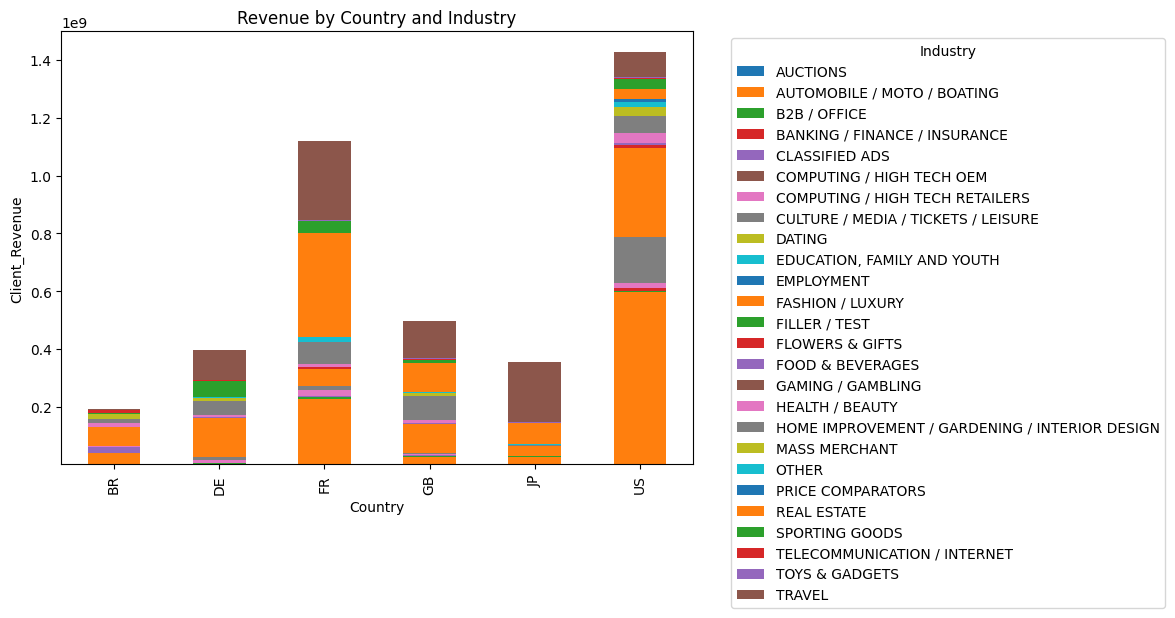

In [36]:
pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Revenue by Country and Industry')
plt.xlabel('Country')
plt.ylabel('Client_Revenue')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


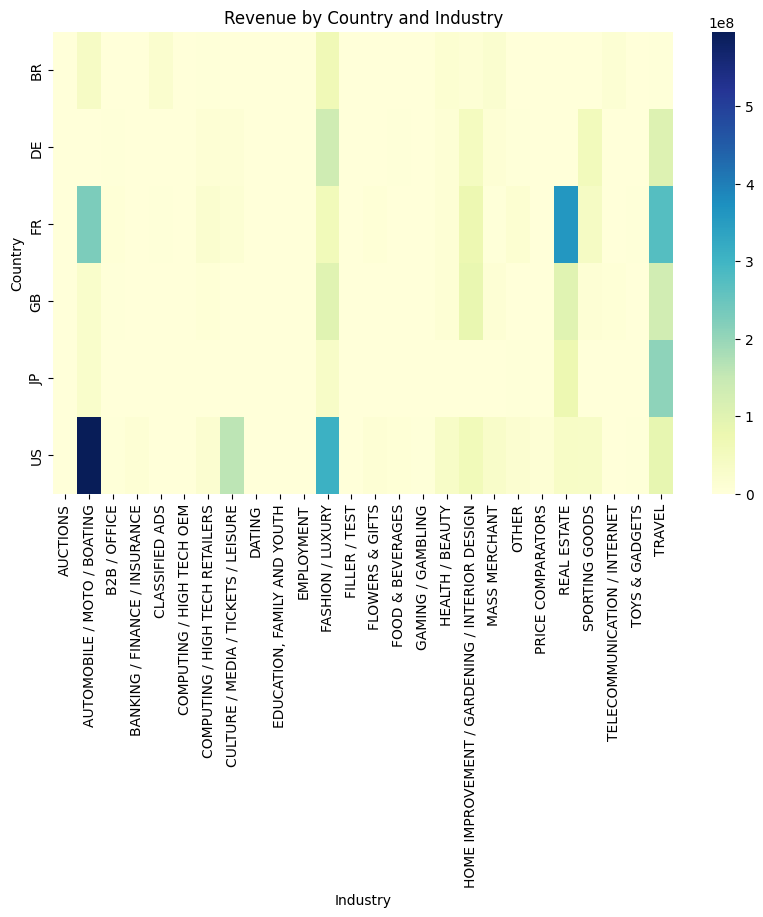

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=False, fmt=".0f", cmap="YlGnBu")
plt.title('Revenue by Country and Industry')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.show()


In [38]:
grouped = df_.groupby(['Country', 'Industry'])['Client_Revenue'].sum().reset_index()\
          .rename(columns={'Client_Revenue': 'Industry_Revenue'})
grouped.head()

,Country,Industry,Industry_Revenue
0,BR,AUCTIONS,0.00
1,BR,AUTOMOBILE / MOTO / BOATING,"38,221,606.45"
2,BR,B2B / OFFICE,"825,707.46"
3,BR,BANKING / FINANCE / INSURANCE,"238,005.71"
4,BR,CLASSIFIED ADS,"22,753,708.58"


In [39]:
# for each country, find the industry with the highest revenue
top_industry_per_country = grouped.loc[grouped.groupby('Country')['Industry_Revenue'].idxmax()]\
                           .sort_values(by='Industry_Revenue', ascending=False)
top_industry_per_country

,Country,Industry,Industry_Revenue
118,US,AUTOMOBILE / MOTO / BOATING,"596,372,055.65"
66,FR,REAL ESTATE,"358,910,782.30"
116,JP,TRAVEL,"207,887,315.78"
32,DE,FASHION / LUXURY,"134,671,582.57"
95,GB,TRAVEL,"129,095,404.93"
8,BR,FASHION / LUXURY,"63,804,384.77"


In [40]:
total_revenue_per_country = grouped.groupby('Country')['Industry_Revenue'].sum().reset_index()
total_revenue_per_country.rename(columns={'Industry_Revenue': 'Total_Revenue_by_Country'}, inplace=True)
total_revenue_per_country

,Country,Total_Revenue_by_Country
0,BR,"192,178,725.62"
1,DE,"397,887,676.04"
2,FR,"1,119,818,654.50"
3,GB,"496,625,694.51"
4,JP,"354,035,987.77"
5,US,"1,427,777,297.12"


In [41]:
# merge dfs
top_industry_per_country = top_industry_per_country.merge(
    total_revenue_per_country,
    on='Country'
)
top_industry_per_country

,Country,Industry,Industry_Revenue,Total_Revenue_by_Country
0,US,AUTOMOBILE / MOTO / BOATING,"596,372,055.65","1,427,777,297.12"
1,FR,REAL ESTATE,"358,910,782.30","1,119,818,654.50"
2,JP,TRAVEL,"207,887,315.78","354,035,987.77"
3,DE,FASHION / LUXURY,"134,671,582.57","397,887,676.04"
4,GB,TRAVEL,"129,095,404.93","496,625,694.51"
5,BR,FASHION / LUXURY,"63,804,384.77","192,178,725.62"


In [42]:
top_industry_per_country['Percent'] = (
    top_industry_per_country['Industry_Revenue'] / top_industry_per_country['Total_Revenue_by_Country']
) * 100

top_industry_per_country['Percent'] = top_industry_per_country['Percent'].round(2)
top_industry_per_country

,Country,Industry,Industry_Revenue,Total_Revenue_by_Country,Percent
0,US,AUTOMOBILE / MOTO / BOATING,"596,372,055.65","1,427,777,297.12",41.77
1,FR,REAL ESTATE,"358,910,782.30","1,119,818,654.50",32.05
2,JP,TRAVEL,"207,887,315.78","354,035,987.77",58.72
3,DE,FASHION / LUXURY,"134,671,582.57","397,887,676.04",33.85
4,GB,TRAVEL,"129,095,404.93","496,625,694.51",25.99
5,BR,FASHION / LUXURY,"63,804,384.77","192,178,725.62",33.20
